## Experiment to Visualize LFP Decision Boundaries on Toy Data

### Imports

In [1]:
import click
import os
import joblib
import json
import random
import copy
import logging
from tqdm import tqdm
#os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import matplotlib.pyplot as plt
import numpy as np
import torch
import os

from lfp.model import models as models
from lfp.data import transforms as transforms
from lfp.data import datasets as datasets
from lfp.data import dataloaders as dataloaders
from lfp.propagation import propagator_lxt as propagator
from lfp.propagation import make_composites
from lfp.utils import arguments as argument_utils
from lfp.evaluation import evaluate as evaluate
from lfp.rewards import rewards as rewards

### Paths, Dataset, Model

In [2]:
savepath = f"/media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f51/reward-backprop/resubmission-1-experiments/activation-plots/"
os.makedirs(savepath, exist_ok=True)

In [3]:
# Plot Settings
# Set font properties.
import matplotlib.font_manager as font_manager
font_path = plt.matplotlib.get_data_path() + "/fonts/ttf/cmr10.ttf"
cmfont = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = cmfont.get_name()
plt.rcParams["mathtext.fontset"] = "cm"

# Set font size.
plt.rcParams["font.size"] = 15

# Disable unicode minus.
plt.rcParams["axes.unicode_minus"] = False

# Use mathtext for axes formatters.
plt.rcParams["axes.formatter.use_mathtext"] = True

plt.rcParams['axes.linewidth'] = 1.5

import matplotlib.cm as cm

relu


/tmp/ipykernel_91192/2845298683.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(colormap, 256)


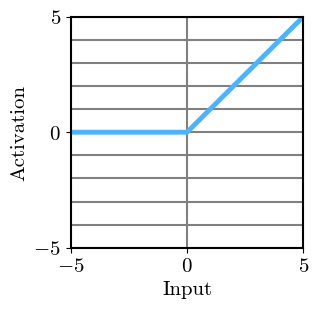

sigmoid


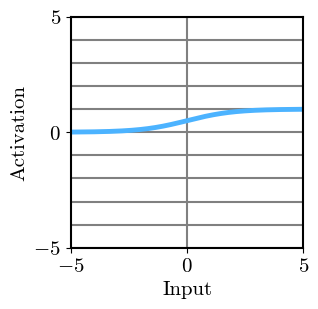

silu


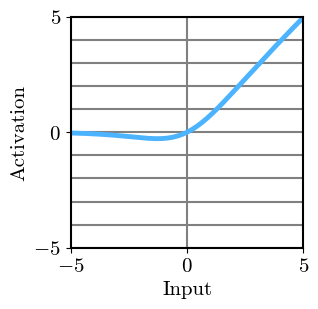

leakyrelu


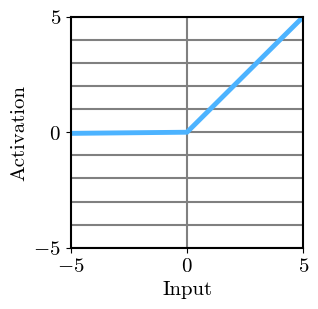

tanh


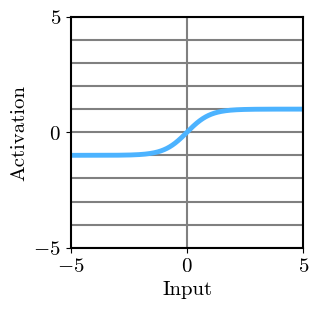

elu


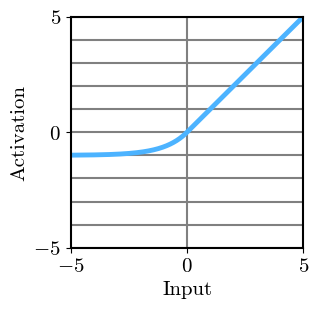

step


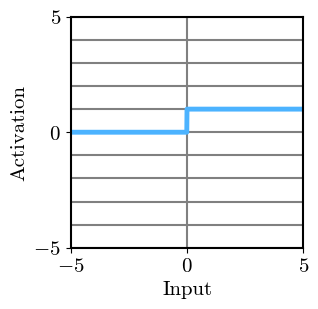

steprelu


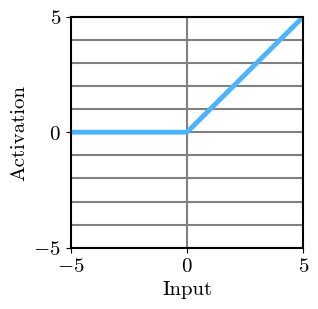

stepleakyrelu


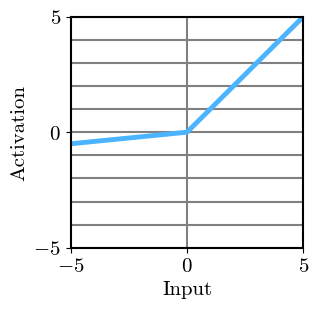

sixstep


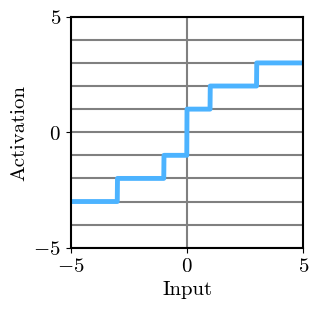

clippedlinear


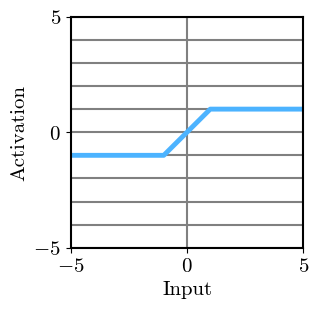

expsteps


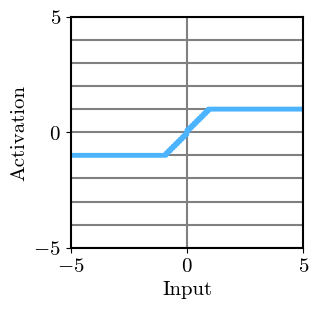

doublestep


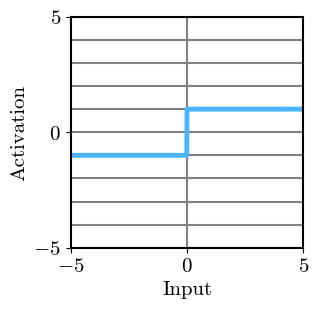

In [4]:
def plot_activation(fn, xlim=(-2, 2), colormap="cool", fname = ""):

    from matplotlib.colors import ListedColormap
    pastel=0.0
    cmap = cm.get_cmap(colormap, 256)
    palette = cmap(np.linspace(0.3, 0.7, 256))
    palette = (1-pastel)*palette+pastel*np.ones((256, 4))

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))

    data = torch.arange(xlim[0], xlim[1], 0.01)
    act = fn()(data)

    ax.plot(data, act, color=palette[0], linewidth=3.5, alpha=1)
    linelocs=[0.0]
    ax.vlines(linelocs, ymin=xlim[0], ymax=xlim[1], color=(0.5, 0.5, 0.5, 1), linewidth=1.5, zorder=0)
    linelocs = np.arange(xlim[0], xlim[1]+1.0, 1.0)
    ax.hlines(linelocs, xmin=xlim[0], xmax=xlim[1], color=(0.5, 0.5, 0.5, 1), linewidth=1.5, zorder=0)

    ax.set_xlabel("Input")
    ax.set_ylabel("Activation")
    ax.set_xticks([-5, 0, 5])
    ax.set_yticks([-5, 0, 5])
    ax.set_xlim([xlim[0], xlim[1]])
    ax.set_ylim([xlim[0], xlim[1]])

    plt.show()

    fig.savefig(fname)

for name, activation in models.ACTIVATION_MAP.items():
    print(name)
    plot_activation(activation, xlim=(-5, 5), colormap="cool", fname = os.path.join(savepath, f"activation-{name}.svg"))